<a href="https://colab.research.google.com/github/fdmy2713-dotcom/ADS1/blob/main/ADS1_Solutions_Unit03_Tutorial_3_0__Data_Cleaning_and_Reading_Errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science 1 : Tutorial 3

# PART 1:  Data Cleaning with Panda and Plotting
In the real world, most data you will encounter is messy and noisy and almost certainly not formatted in a way you might want.
Let's take a look at some examples.

Download **WB_Population.csv** dataset from BB and import into Google Colab

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# READ in the csv file using Panda library
df_pop = pd.read_csv('WB_population.csv')
#find how many rows and columns
print(df_pop.shape) # find out the rows and columns size
df_pop.head() #show the first 5 rows fo the dataframe

(266, 68)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


Looks like we have a lot of years as columns, and a few unhelpful columns.

In [3]:
df_pop = pd.read_csv('WB_population.csv')
# changing the index column to "Country Name" if we didn't do that in the read_csv
df_pop.set_index('Country Name', inplace=True)
# dropping uninteresting columns:Indicator Name, Indicator Code, Country Code

df_pop.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code'])
df_pop.head()
# dropping missing values, default is rows (axis=0) and how='any'
df_pop.dropna(axis=1, how='all', inplace=True)
df_pop.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [4]:
df_popT = df_pop.T  # or df_pop.transpose()
# looking at the index now
print(df_popT.index)
# convert those strings into something numerical
# Drop non-numeric index entries before converting to numeric
df_popT = df_popT.drop(['Country Code', 'Indicator Name', 'Indicator Code'])
df_popT.index = pd.to_numeric(df_popT.index)
print(df_popT.index)
# set the year index to be a datetime object instead
df_popT.index = pd.to_datetime(df_popT.index, format='%Y')
print(df_popT.index)
# a population should not be a float
for col in df_popT.columns:
    df_popT[col] = df_popT[col].astype(int, errors='ignore')
display(df_popT.head())

Index(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')
Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960-01-01,54608,130692579,8622466,97256290,5357195,1608800,9443,93359407,133426,20349744,...,32500,32718461,64608,3031474234,113335,947000,5542459,16520441,3119430,3806310
1961-01-01,55811,134169237,8790140,99314028,5441333,1659800,10216,95760348,140984,20680653,...,34300,33621982,66462,3072421801,116820,966000,5646668,16989464,3219451,3925952
1962-01-01,56682,137835590,8969047,101445032,5521400,1711319,11014,98268683,148877,21020359,...,35000,34533889,68391,3126849612,120163,994000,5753386,17503133,3323427,4049778
1963-01-01,57475,141630546,9157465,103667517,5599827,1762621,11839,100892507,157006,21364017,...,39800,35526727,70400,3193428894,123416,1022000,5860197,18042215,3431381,4177931
1964-01-01,58178,145605995,9355514,105959979,5673199,1814135,12690,103618568,165305,21708487,...,40800,36509166,72493,3260441925,126582,1050000,5973803,18603097,3542764,4310332


Note we would have to modify this if some of our columns should not be integers.
The errors='ignore' is because there are some NaN values within the dataset.
Let's look at a subset of this data.

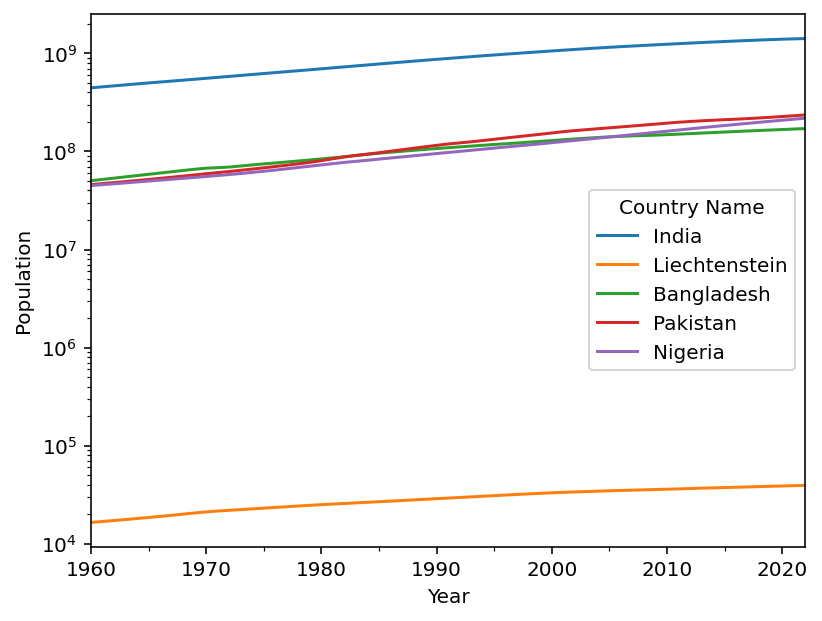

In [5]:
df_sub = df_popT[["India", "Liechtenstein", "Bangladesh", "Pakistan", "Nigeria"]].copy()
fig, ax = plt.subplots(dpi=144)
df_sub.plot(ax=ax, xlabel='Year', logy=True, ylabel='Population')
plt.show()

In [6]:
print(df_sub.loc['2013':], end='\n\n')
print(df_sub.iloc[-10:], end='\n\n')
print(df_sub.tail(10), end='\n\n')

print(df_sub.sample(frac=1).head())

Country Name       India  Liechtenstein  Bangladesh   Pakistan    Nigeria
2013-01-01    1291132063          36806   154030139  205337562  174726123
2014-01-01    1307246509          37096   155961299  208251628  179379016
2015-01-01    1322866505          37355   157830000  210969298  183995785
2016-01-01    1338636340          37609   159784568  213524840  188666931
2017-01-01    1354195680          37889   161793964  216379655  193495907
2018-01-01    1369003306          38181   163683958  219731479  198387623
2019-01-01    1383112050          38482   165516222  223293280  203304492
2020-01-01    1396387127          38756   167420951  227196741  208327405
2021-01-01    1407563842          39039   169356251  231402117  213401323
2022-01-01    1417173173          39327   171186372  235824862  218541212

Country Name       India  Liechtenstein  Bangladesh   Pakistan    Nigeria
2013-01-01    1291132063          36806   154030139  205337562  174726123
2014-01-01    1307246509          370

# PART 1: Exercise 1
Take the `access_electric` file, restructuring to only have the years (as a datetime object) as the index and country names as the columns.
Are the percentages in the dataframe an appropriate data type?
There should no be columns with only NaN values.
Then, extract just the BRICS countries (Brazil, Russia, India, China and South Africa) as a subset dataframe, make an appropriate line plot then print the rows from 2000-2020.

Country Name     Brazil  Russian Federation      India       China  \
2000-01-01    94.431412           97.806648  60.292839   96.745056   
2001-01-01    96.016528           97.855209  62.005440   96.985313   
2002-01-01    96.652996           97.895218  62.300000   97.217018   
2003-01-01    96.980098           97.933685  65.412010   97.447189   
2004-01-01    96.765107           97.977623  64.400000   97.682831   
2005-01-01    97.093513           98.034035  68.840454   97.930939   
2006-01-01    97.594314           98.109703  67.900000   98.198303   
2007-01-01    98.125382           98.206207  72.340714   98.486504   
2008-01-01    98.526625           98.319931  74.118492   98.791939   
2009-01-01    98.856938           98.447052  75.000000   99.110756   
2010-01-01    98.600000           99.268158  76.300000   99.700000   
2011-01-01    99.328691           99.209480  79.516785   99.887207   
2012-01-01    99.519494          100.000000  79.900000   99.947433   
2013-01-01    99.575

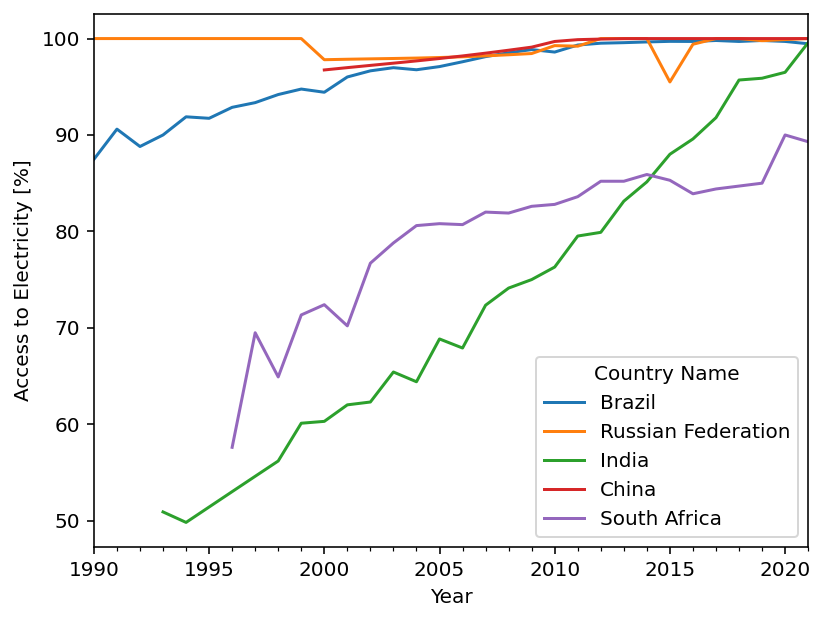

In [7]:
df_electric = pd.read_csv('access_electric.csv', index_col='Country Name').\
    dropna(axis=1, how='all').\
    drop(columns=['Indicator Name', 'Indicator Code', 'Country Code']).T

df_electric.index = pd.to_datetime(df_electric.index, format='%Y')
df_brics = df_electric[["Brazil", "Russian Federation", "India", "China", "South Africa"]].copy()

print(df_brics.loc['2000':'2020'])

fig, ax = plt.subplots(dpi=144)
df_brics.plot(ax=ax, xlabel='Year', ylabel='Access to Electricity [%]')
plt.show()

## End PART 1-Exercise 1
Let's now look at some noisier, higher frequency time series data.

In [8]:
df_ftse = pd.read_csv('FTSE100_2022.csv', index_col='Date')
df_ftse.index = pd.to_datetime(df_ftse.index, format="%d/%m/%y")
df_ftse.sort_index(inplace=True)

In [9]:
def plot_ftse(df):
    """
    Plots the FTSE index
    """
    plt.figure(dpi=144)

    plt.step(df.index, df.Close)

    plt.xlabel('Date [year]')
    plt.ylabel('FTSE')
    plt.show()
    return

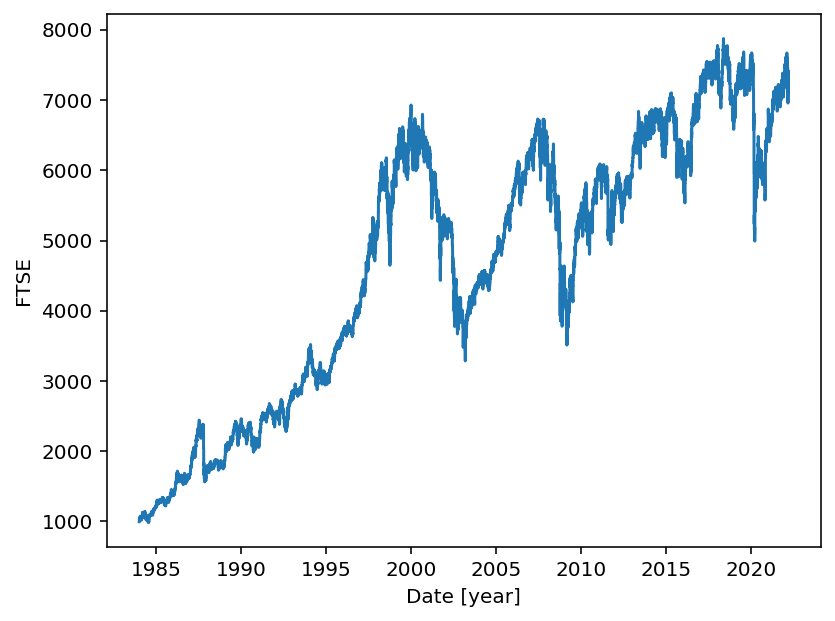

In [10]:
plot_ftse(df_ftse)

We saw this previously. There are a lot of ups and downs on day-to-day trades, so we might be more interested in a ***moving average***. There are a few ways of doing this, but we will focus here on a simple moving average and an exponential moving average (which is typically used in finance).

In [11]:
# Simple Moving Average, monthly and yearly
df_ftse['Monthly Close'] = df_ftse.Close.rolling('30D', center=True).mean()
df_ftse['Yearly Close'] = df_ftse.Close.rolling('365D', center=True).mean()

# Exponential Moving Average, 7-day hold
df_ftse['Weekly Close'] = df_ftse.Close.ewm(halflife=3.5).mean()

In [12]:
def plot_ftse_averaged(df):
    """
    Plots the FTSE index
    """
    fig, axs = plt.subplots(3, dpi=144, sharey=True)
    axs = axs.flatten()

    colours = ('red', 'green', 'blue')
    for i, col in enumerate(df.columns[1:]):
        axs[i].step(df.index, df.Close, label='Close', color='k')
        axs[i].step(df.index, df[col], label=col, color=colours[i])
        axs[i].legend()
        if i < 2:
            axs[i].set_xticklabels([])

    fig.subplots_adjust(hspace=0)
    fig.supxlabel('Date [year]')
    fig.supylabel('FTSE')
    plt.show()
    return

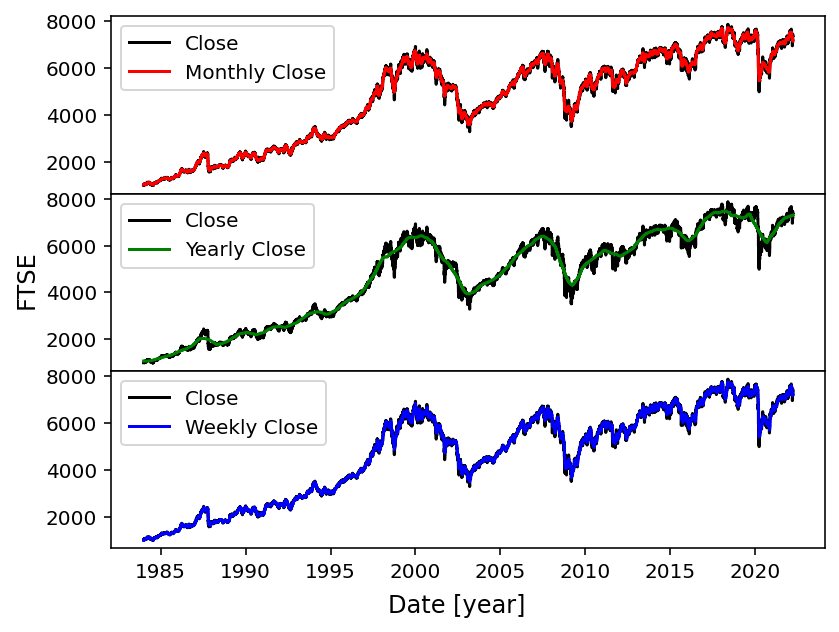

In [13]:
plot_ftse_averaged(df_ftse)

What about if we had missing data in our series?
Let's look at masking data (useful if you want to remove things) and then interpolating.

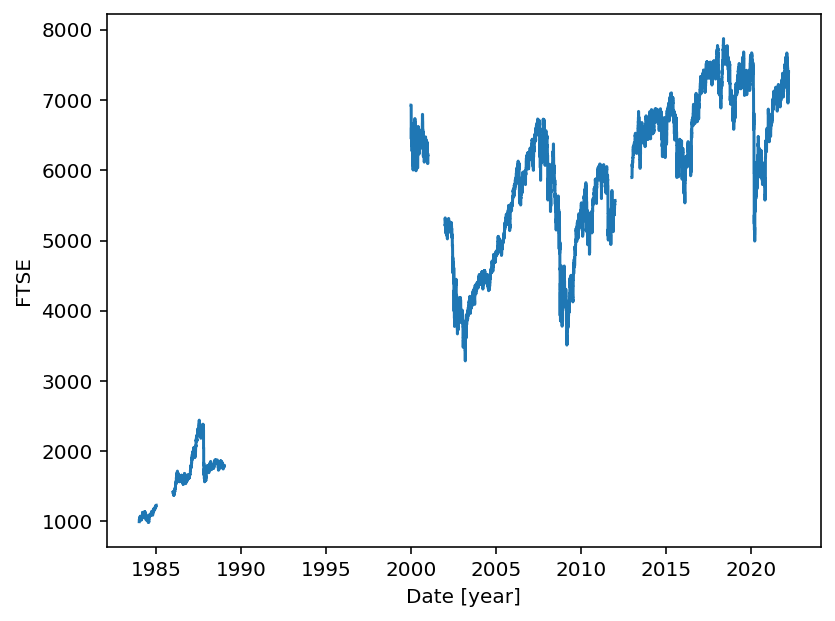

In [14]:
df_ftse_cut = df_ftse.copy()

# delete 6 random years with a mask
unique_years = df_ftse_cut.index.to_period('Y').unique()
selected_years = np.random.choice(unique_years, 6, replace=False)
df_ftse_cut = df_ftse_cut.apply(lambda row: row if row.name.to_period('Y') not in selected_years else np.nan, axis=1)

# Mask out the 90s for a big missing chunk
df_ftse_cut.loc[(df_ftse.index > '1990') & (df_ftse.index < '2000')] = np.nan
plot_ftse(df_ftse_cut)

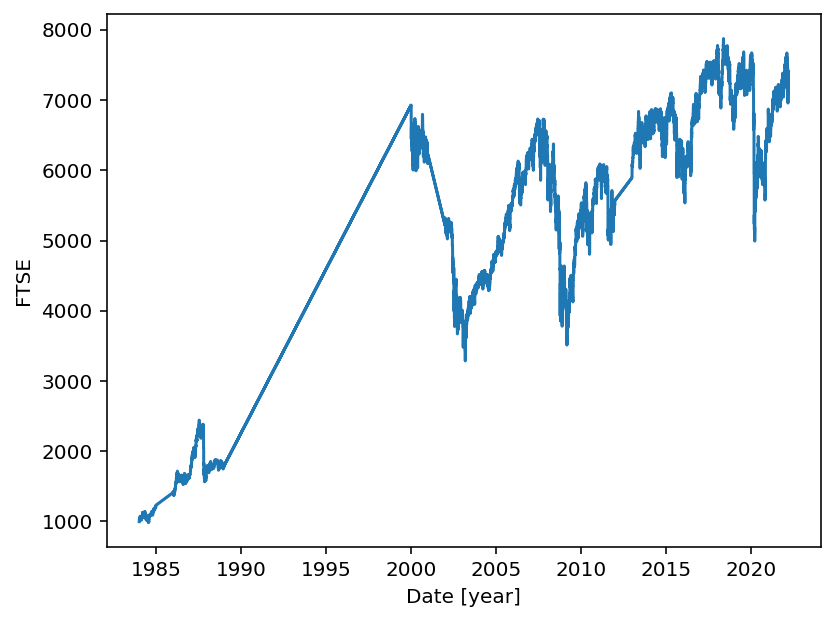

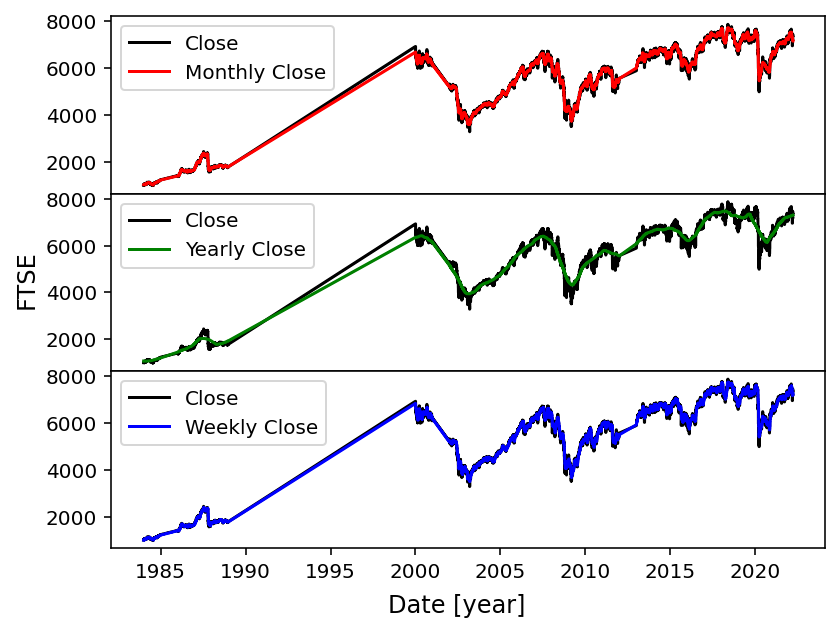

In [15]:
# linearly interpolating, which is not the same as fitting
df_ftse_interp = df_ftse_cut.interpolate()
plot_ftse(df_ftse_interp)
plot_ftse_averaged(df_ftse_interp)

# PART 1: Exercise 2
Delete 10 random years (not 10 in a row) from the `df_pop` dataframe we made earlier.
Interpolate over this dataframe and plot a decadal simple moving average for the European Union.

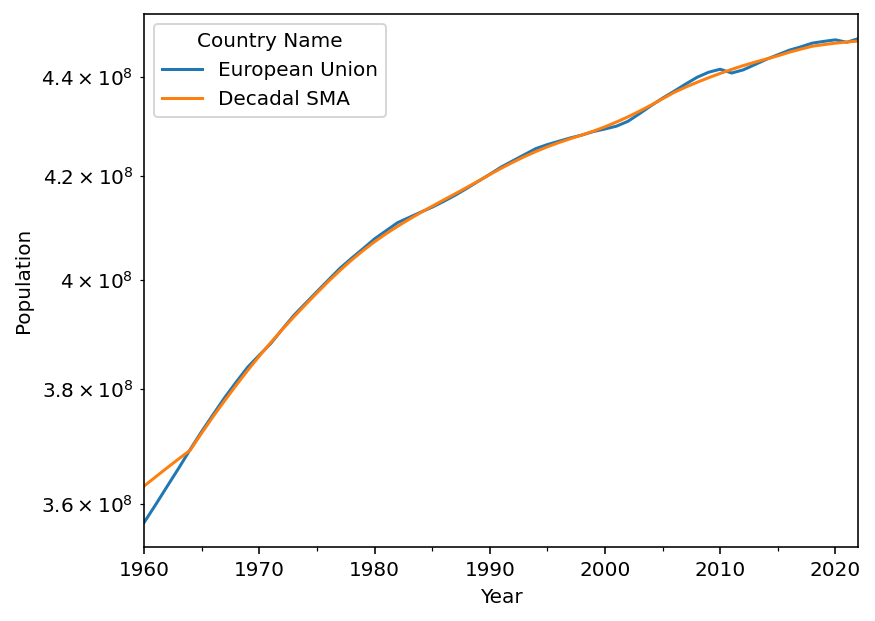

In [16]:
df_pop_cut = df_popT[['European Union']].copy()
unique_years = df_pop_cut.index.to_period('Y').unique()
selected_years = np.random.choice(unique_years, 10, replace=False)
df_pop_cut = df_pop_cut.apply(lambda row: row if row.name.to_period('Y') not in selected_years else np.nan, axis=1).interpolate()

df_pop_cut['Decadal SMA'] = df_pop_cut.rolling('3650D', center=True).mean()

fig, ax = plt.subplots(dpi=144)
df_pop_cut.plot(ax=ax, logy=True, xlabel='Year', ylabel='Population')
plt.show()

## End pf PART 1:Exercise 2

## PART 2: Understanding Python errors
You have probably already encountered many errors in your python coding.
One of the most important skills in coding is being able to anticipate, understand and handle errors.

In [19]:
# Missing colon at the end of the "if statement"
if True:
    print("This will cause a SyntaxError")

This will cause a SyntaxError


In [22]:
##with open('notafile', 'r') as f:
    ##f.readlines()
try:
    with open('notafile', 'r') as f:
        lines = f.readlines()
        print(lines)
except FileNotFoundError:
    print("Error: The file 'notafile' does not exist.")

Error: The file 'notafile' does not exist.


In [23]:
# Using an undefined variable
print(undeclared_variable)

NameError: name 'undeclared_variable' is not defined

In [33]:
# Adding a string and an integer
result = "Age: " + 25

TypeError: can only concatenate str (not "int") to str

In [34]:
# Accessing an out-of-range index in a list
my_list = [1, 2, 3]
print(my_list[3])

IndexError: list index out of range

In [35]:
my_dict = {'name': 'Alice'}
print(my_dict['age'])

KeyError: 'age'

In [36]:
# Trying to call a non-existent method of an object
"hello".non_existent_method()

AttributeError: 'str' object has no attribute 'non_existent_method'

In [37]:
# Converting a string to an integer where it's not possible
int("this is not a number")

ValueError: invalid literal for int() with base 10: 'this is not a number'

In [38]:
# Division by zero
result = 10 / 0

ZeroDivisionError: division by zero

There are two types of code: development and production.
In development code, we want to find errors and understand what is causing them.
In production code, we want the script to run to completion, i.e. "it just works".

Good practice is to create python tests which invert the logic, in that you deliberately provide them things which **should** cause a failure.

In [39]:
# can do this with pytest, which may not be installed
!pip install pytest
#  !pip install ipytest  # just a workaround for jupyter
import pytest
import ipytest
ipytest.autoconfig()

ModuleNotFoundError: No module named 'ipytest'

In [40]:
!pip install ipytest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.5 MB/s eta 0:00:00


In [41]:
def calculate_pi(c: float, d: float) -> float:
    """
    Calculates pi from a circumference and a diameter
    """
    return c / d

In [42]:
%%ipytest -qq
def test_calculate_pi():
    """
    Tests calculate_pi function
    """
    circumference = 31.4159
    diameter = 10
    expected_pi = 3.14159

    calculated_pi = calculate_pi(circumference, diameter)
    assert pytest.approx(calculated_pi, 0.00001) == expected_pi

    with pytest.raises(ZeroDivisionError):
        calculate_pi(circumference, 0)

    with pytest.raises(TypeError):
        calculate_pi("circumference", diameter)

    return

UsageError: Cell magic `%%ipytest` not found.


For production code, we would to handle these, attempt to fix anything, and then convert the error message into something more useful.

In [43]:
def __calculate_pi(c: float, d: float) -> float:
    """
    Calculates pi from a circumference and a diameter
    """
    if not isinstance(c, float) and not isinstance(c, int):
        try:
            c = float(c)
        except ValueError:
            print('Circumference needs to be a float!')
            return
    if not isinstance(d, float) and not isinstance(d, int):
        try:
            d = float(d)
        except ValueError:
            print('Diameter needs to be a float!')
            return
    if np.isclose(d, 0):
        print('Diameter cannot be zero')
        return

    pi_calc = c / d
    if not np.isclose(pi_calc, np.pi):
        print('Bad measurements of circumference and diameter')
        return
    return pi_calc

In [44]:
def handled_calculate_pi(c: float, d: float) -> float:
    """
    Calculates pi from a circumference and diameter
    """
    return __calculate_pi(c, d)

In [45]:
handled_calculate_pi(31.4159, 10)

3.14159

In [46]:
handled_calculate_pi('31', 10)

Bad measurements of circumference and diameter


In [47]:
handled_calculate_pi('not a number', 10)

Circumference needs to be a float!


In [48]:
handled_calculate_pi(31.4159, 0)

Diameter cannot be zero


# Exercise 3
Create a `process_data` function, it should convert an input into an integer as a new variable, divide 100 by that integer input and access the `.lower()` method of the original input (which strings have). The division result and the `.lower()` result should be returned by the function. Give some example uses such that a TypeError, AttributeError, ValueError and ZeroDivisionError are encountered.

In [28]:
def process_data(data):
    try:
        int_data = int(data)
        result = 100 / int_data
        lowdata = data.lower()
        return result, lowdata

    except (ValueError, TypeError):
        print("Data cannot be converted to an integer.")
    except ZeroDivisionError:
        print("Division by zero.")
    except AttributeError:
        print("Data does not have a 'lower' attribute (not a string).")

In [29]:
process_data("50")

(2.0, '50')

In [30]:
process_data([1, 2, 3])

Data cannot be converted to an integer.


In [31]:
process_data("abc")

Data cannot be converted to an integer.


In [32]:
process_data(0)

Division by zero.


## End Exercise 3